# (Ford GoBike System Data)
## by (Ramy Heshmat)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# import the csv file dataset
df = pd.read_csv('C:/Users/remoo/OneDrive/Desktop/Vis Project/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# getting the info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# removing the rows containing the null values 
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
# getting the number of rows and columns 
df.shape

(174952, 16)

In [6]:
# getting the types of the data in the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# changing the dtypes of the varibles
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['start_station_latitude'] = df['start_station_latitude'].astype('str')
df['end_station_latitude'] = df['end_station_latitude'].astype('str')
df['start_station_longitude'] = df['start_station_longitude'].astype('str')
df['end_station_longitude'] = df['end_station_longitude'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('str')

df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                      int32
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [8]:
# creating columns in the dataset for duration in mins, duration in hours, getting the starting hour and day and creating the member age column
df['duration_min'] = df['duration_sec']/60
df['duration_hr'] = df['duration_min'] /60
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_time_dayofweek'] = df.start_time.dt.strftime('%A')
df['member_age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_hour_of_day,start_time_dayofweek,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,869.750000,14.495833,17,Thursday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.7693053,-122.4268256,3,Powell St BART Station (Market St at 4th St),37.78637526861584,...,5905,Customer,1972,Male,No,1030.900000,17.181667,12,Thursday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.77483629413345,-122.44654566049576,70,Central Ave at Fell St,37.77331087889723,...,6638,Subscriber,1989,Other,No,608.166667,10.136111,17,Thursday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.8045623549303,-122.27173805236816,222,10th Ave at E 15th St,37.7927143,...,4898,Subscriber,1974,Male,Yes,26.416667,0.440278,23,Thursday,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,323,Broadway at Kearny,37.79801364395978,...,5200,Subscriber,1959,Male,No,29.883333,0.498056,23,Thursday,60


In [9]:
# getting the duplicated values
df.duplicated().sum()

0

In [10]:
# value counts of the user type
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [11]:
# value counts of the member gender
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [12]:
# value count for the bike share 
df.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [13]:
# getting the earlier and the last starting times of the dataset
df.start_time.min(), df.start_time.max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [14]:
# getting the earlier and the last ending times of the dataset
df.end_time.min(), df.end_time.max()

(Timestamp('2019-02-01 00:04:52.058000'),
 Timestamp('2019-03-01 08:01:55.975000'))

In [15]:
# getting the dtypes of the varoables after editing 
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                      int32
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
duration_min                      float64
duration_hr                       float64
start_hour_of_day                  object
start_time_dayofweek               object
member_age                          int32
dtype: object

In [16]:
# the earliest birth year and the oldest birth year
df['member_birth_year'].min(), df['member_birth_year'].max()

(1878, 2001)

In [17]:
# the youngest and oldest member's age 
df['member_age'].min(), df['member_age'].max(), 

(18, 141)

In [18]:
# the least and largest durations in minutes
df['duration_min'].min(), df['duration_min'].max()

(1.0166666666666666, 1409.1333333333334)

In [19]:
# the least and largest durations in hours
df['duration_hr'].min(), df['duration_hr'].max()

(0.016944444444444443, 23.485555555555557)

In [20]:
# getting some statistics about the numeric variables in the dataset
df.describe()

,duration_sec,start_station_id,end_station_id,member_birth_year,duration_min,duration_hr,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,1984.803135,11.733379,0.195556,34.196865
std,1642.204905,111.648819,111.335635,10.118731,27.370082,0.456168,10.118731
min,61.000000,3.000000,3.000000,1878.000000,1.016667,0.016944,18.000000
25%,323.000000,47.000000,44.000000,1980.000000,5.383333,0.089722,27.000000
50%,510.000000,104.000000,101.000000,1987.000000,8.500000,0.141667,32.000000
75%,789.000000,239.000000,238.000000,1992.000000,13.150000,0.219167,39.000000
max,84548.000000,398.000000,398.000000,2001.000000,1409.133333,23.485556,141.000000


In [21]:
# getting the number of unique values in the dataset
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
duration_min                 4429
duration_hr                  4429
start_hour_of_day              24
start_time_dayofweek            7
member_age                     75
dtype: int64

In [22]:
# ordering the starting hours in ordinal categorical manner 
hour_order = ['00','01','02','03','04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
ordered_hours = pd.api.types.CategoricalDtype(ordered = True, categories = hour_order)
df['start_hour_of_day'] = df['start_hour_of_day'].astype(ordered_hours)

In [23]:
# ordering the weekdays in ordinal categorical manner 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_days)

In [24]:
# getting the data types after the last edit
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                      int32
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
duration_min                      float64
duration_hr                       float64
start_hour_of_day                category
start_time_dayofweek             category
member_age                          int32
dtype: object

In [25]:
# saving to the dataset
df.to_csv('201902-fordgobike-tripdata.csv')

### What is the structure of your dataset?

The original dataset structure is about:  
**duration** in the duration_sec,  
**time** in the variables start_time, end_time,  
**place** in the variables start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, start_station_id, end_station_id, start_station_name, end_station_id,  
**member** in the varibles user_type, member_gender, member_birth_year  
In the cleaned dataset we addd columns:  
duration_min, duration_hr, start_hour_of_the_day, start_time_ofdayweek, start_time_month, member_age
### What is/are the main feature(s) of interest in your dataset?

In this dataset we will see the relation between the user type, gender, age and the duration of the trip, the common start_time and common start station and end station, most common day of the week and hour of the day


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The member age will help us focusing on the targeted age, also the user gender, trip duration will help also for each of the member charcteristics.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [26]:
# setting the chart styles and the main color
sb.set_style('darkgrid')
color_base = sb.color_palette()[0]

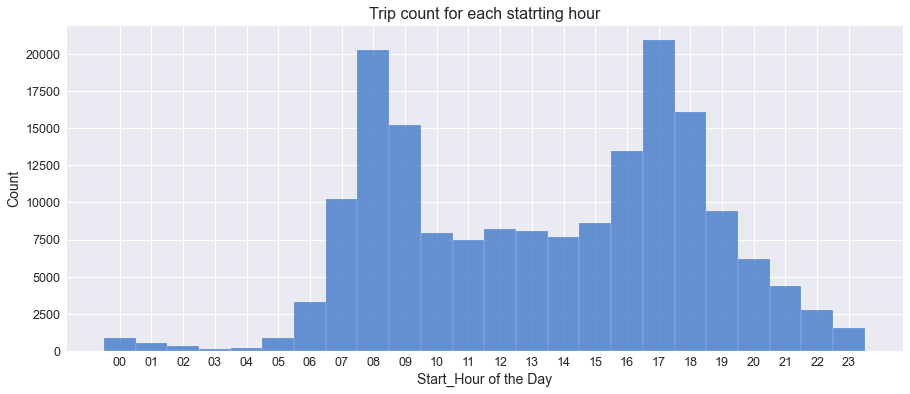

In [27]:
# plotting the starting hour of the day in a histogram
plt.figure(figsize = [15,6])
sb.histplot(data = df, x='start_hour_of_day', color= color_base, bins =24)
plt.xlabel('Start_Hour of the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Trip count for each statrting hour', fontsize = 16);

The chart is bimodal and the rush hours in the count of trips are 08, 17

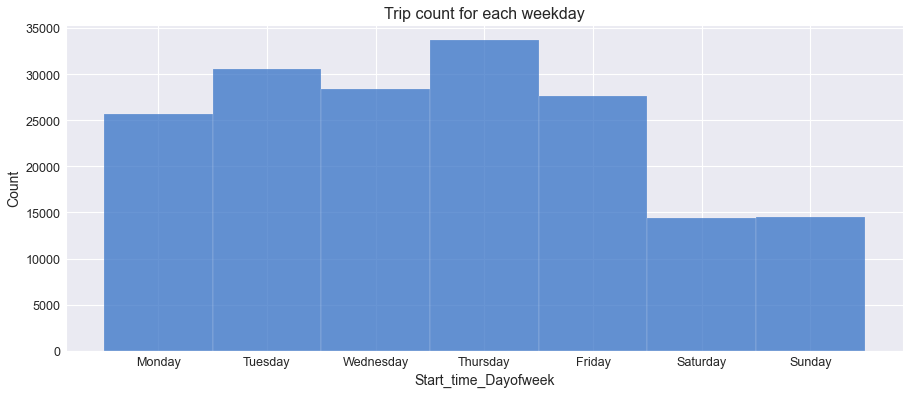

In [28]:
# plotting the weekdays of the day in a histogram
plt.figure(figsize = [15,6])
g = sb.histplot(data = df, x= 'start_time_dayofweek', color= color_base, bins = 7)
plt.xlabel('Start_time_Dayofweek', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Trip count for each weekday', fontsize = 16);

The users prefer Thursday to go on a bike trip

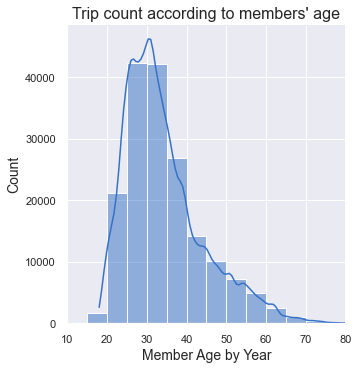

In [29]:
# plotting the member age in a histogram and kde
bins= np.arange(0, df['member_age'].max()+.1, 5)
sb.set(rc = {'figure.figsize':(20,10)})
sb.displot(df['member_age'], color= color_base, bins=bins, kde=True)
plt.xlim([10,80])
plt.xlabel('Member Age by Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Trip count according to members\' age', fontsize = 16);

The chart is rightly skewed and as the age is increased, the trip count is decreased 

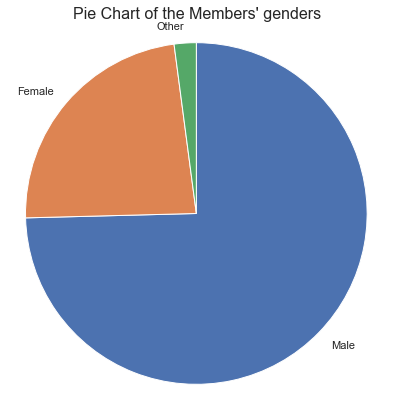

In [30]:
# pie chart of the member gender
plt.figure(figsize = [10,7])
member_gender_count = df['member_gender'].value_counts()
plt.pie(member_gender_count, labels = member_gender_count.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Pie Chart of the Members\' genders', fontsize = 16);

It is obvious from the pie chart above is that male users are the most

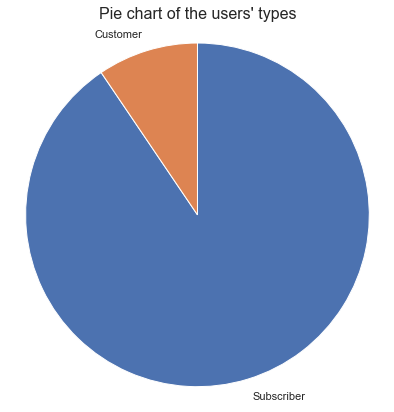

In [31]:
# pie chart of the user type
plt.figure(figsize = [10,7])
user_type_count = df['user_type'].value_counts()
plt.pie(user_type_count, labels = user_type_count.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Pie chart of the users\' types', fontsize = 16);

This pie chart is explaining that most of the users are subscribers

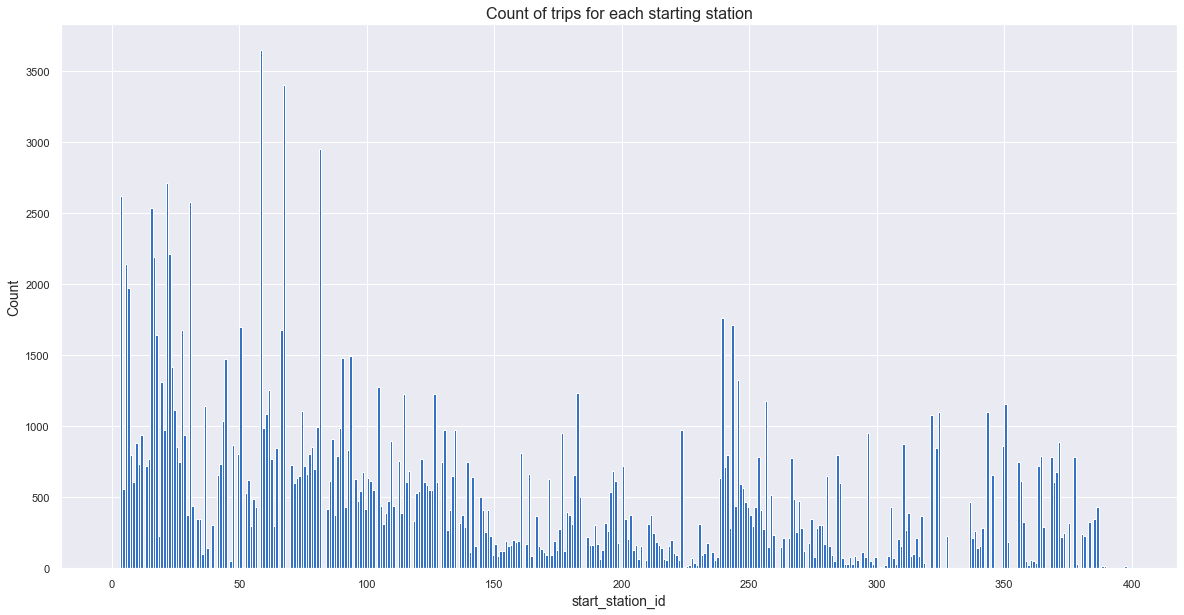

In [32]:
# plotting the trip count of each start station
bins = np.arange(0, df['start_station_id'].max()+0.1, 1)
plt.figure(figsize = [20,10])
plt.hist(data = df, x='start_station_id', color= color_base, bins = bins)
plt.xlabel('Start Station Id', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of trips for each starting station', fontsize = 16);

This chart counting the bike trips for each start station

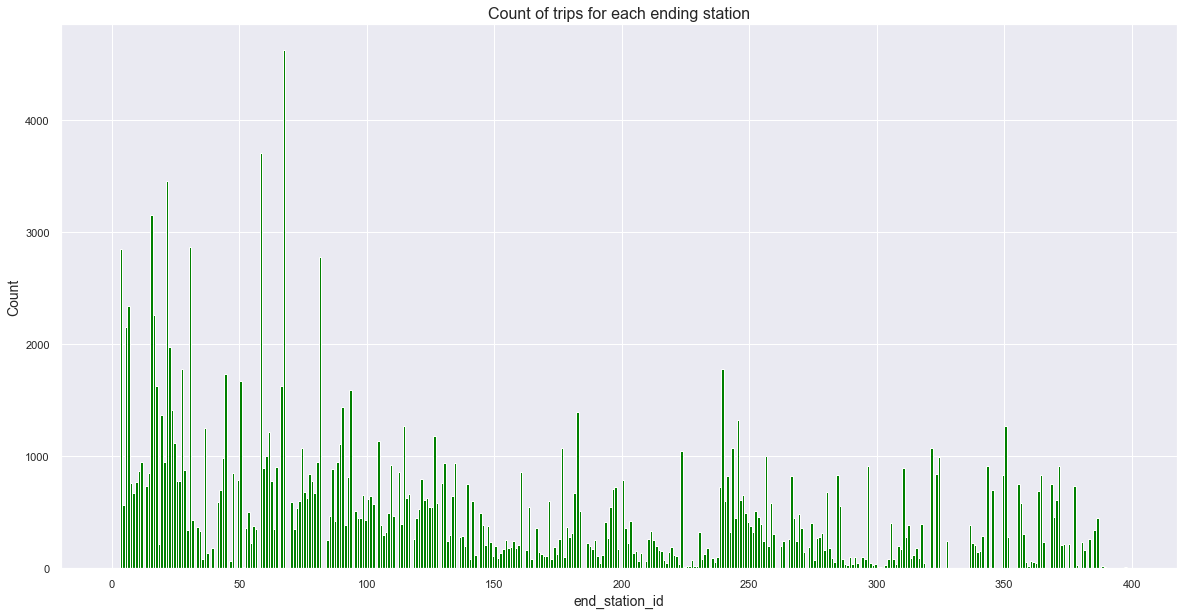

In [33]:
# plotting the trip count of each end station
bins = np.arange(0, df['end_station_id'].max()+0.1, 1)
plt.figure(figsize = [20,10])
plt.hist(data = df, x='End Station Id', color= 'green', bins = bins)
plt.xlabel('end_station_id', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of trips for each ending station', fontsize = 16);

This chart counting the bike trips for each end station

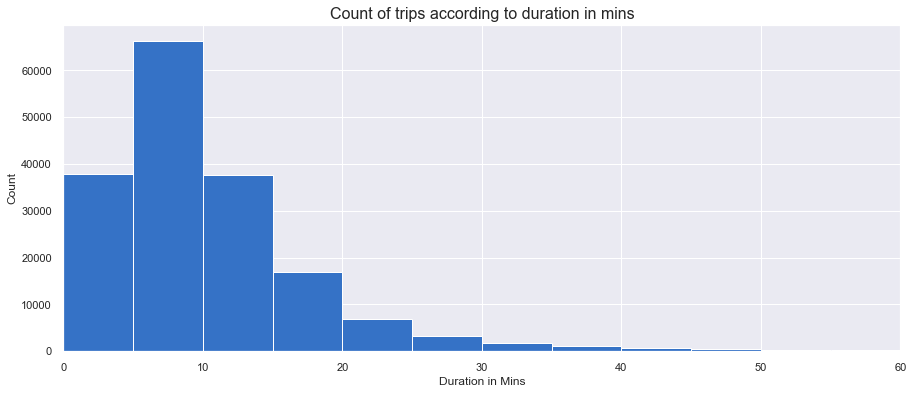

In [34]:
# plotting the duration of trips in minutes in a histogram
plt.figure(figsize = [15,6])
bins = np.arange(0, df['duration_min'].max()+0.1, 5)
plt.hist(data = df, x='duration_min', color= color_base, bins=bins)
plt.xlim(0,60)
plt.xlabel('Duration in Minutes')
plt.ylabel('Count')
plt.title('Count of trips according to duration in mins', fontsize = 16);

This chart showing that most of bike trip durations are about 10 mins, most of the trips are betwen 5 and 15 mins

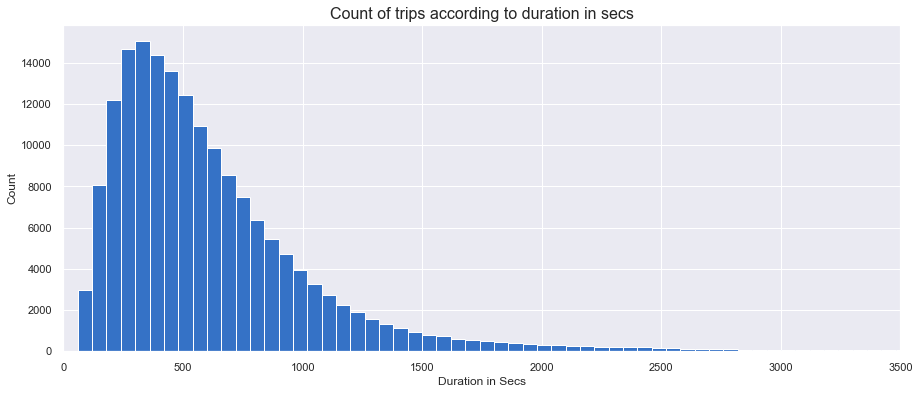

In [35]:
# plotting the duration of trips in seconds in a histogram
plt.figure(figsize = [15,6])
bins = np.arange(0, df['duration_sec'].max()+0.1, 60)
plt.hist(data = df, x='duration_sec', color= color_base, bins=bins)
plt.xlim(0, 3500)
plt.xlabel('Duration in Seconds')
plt.ylabel('Count')
plt.title('Count of trips according to duration in secs', fontsize = 16);

The trip duration in secs is supporting the previous chart about trip duration in mins

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The start_hour_of_the_day has a bimodal distribution, the highest levels are on the 08 and 17 hours  
> The week_day is abnormally distributed  
> The member_ age is distribution is right skewed  
> Duration in mins and secs are also skewed to the right

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes the distribution of the trip duration in mins and secs are rightly skewed, we didn't need any transformation as the data is straightforward

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

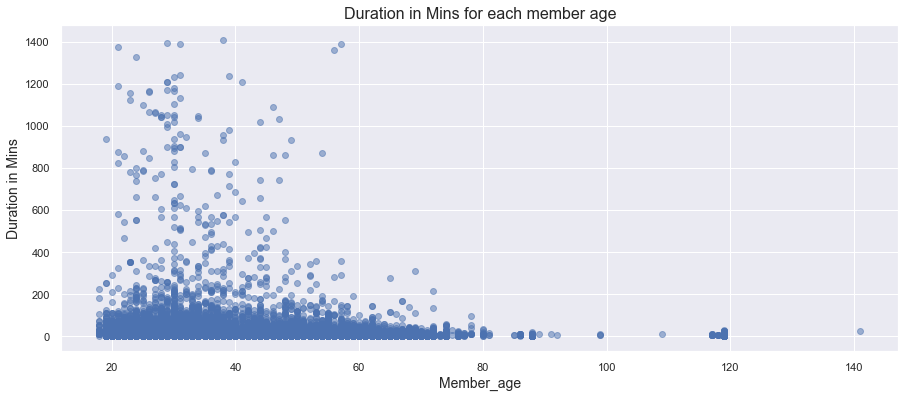

In [36]:
# plotting the relationship between the member age and the duration in minutes in a scatterplot
plt.figure(figsize =[15,6])
plt.scatter(data = df, x='member_age', y='duration_min', alpha = 0.5)
plt.xlabel('Member age by Year', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Duration in Mins for each member age' , fontsize = 16);

This scatter chart showing the relationship between the member age and the trip duration in mins as the age is increased the trip durtaion is decreased in a negative correlation and this is logic.

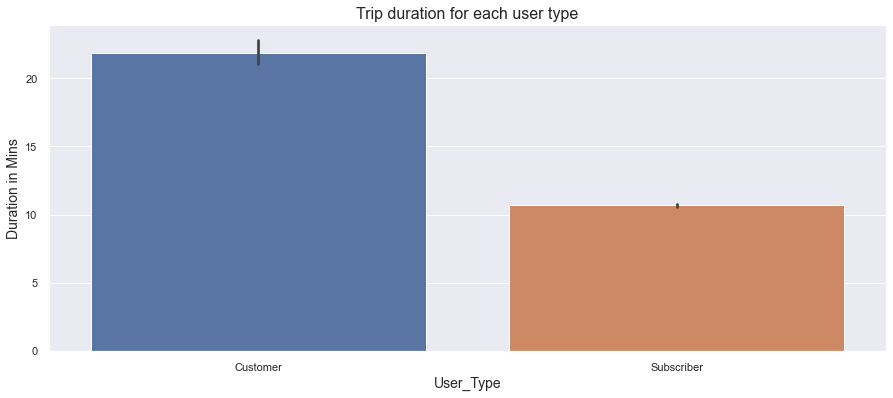

In [37]:
# bar plot of the user type and the trip duration in mins 
plt.figure(figsize =[15,6])
sb.barplot(data = df, x='user_type', y='duration_min')
plt.xlabel('User_Type', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Trip duration for each user type', fontsize = 16);

This bar chart showing that customers going on bike trips for more time than subscribers

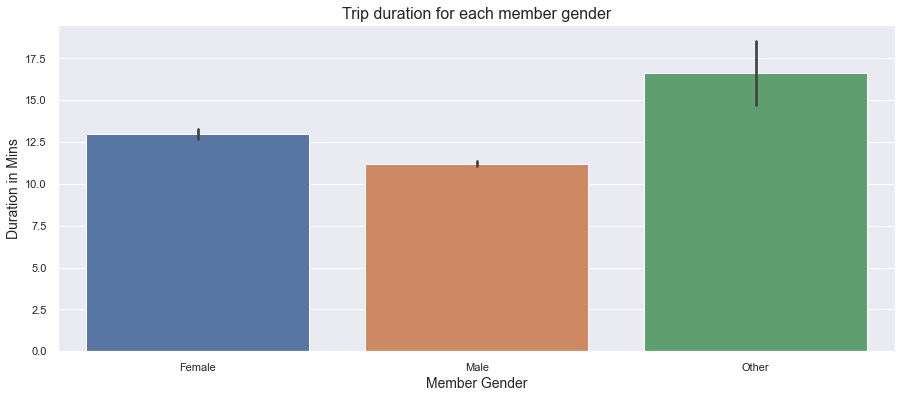

In [38]:
# bar plot of the member gender and the trip duration in mins
plt.figure(figsize =[15,6])
sb.barplot(data = df, x='member_gender', y='duration_min')
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Trip duration for each member gender', fontsize = 16);

Female users have the longer trip durations than male users

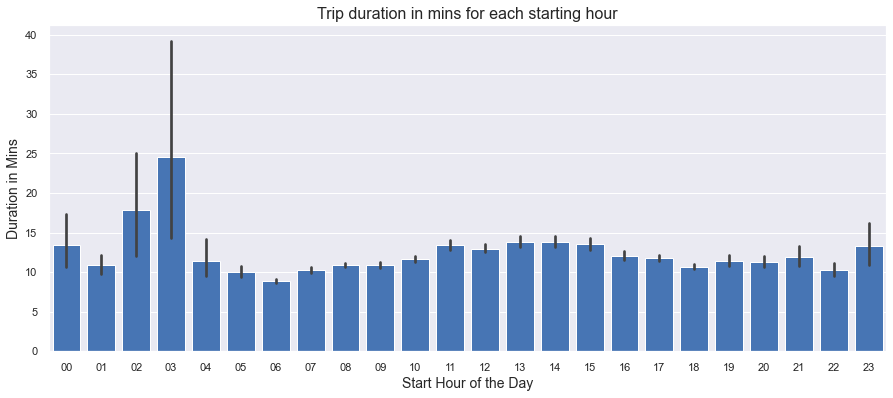

In [39]:
# plotting the relationship between the starting hour and the trip duration in mins in a bar chart
plt.figure(figsize = [15,6])
g = sb.barplot(data = df, x ='start_hour_of_day', y='duration_min', color= color_base)
plt.xlabel('Start Hour of the Day', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Trip duration in mins for each starting hour', fontsize = 16);

This bar chart showing that 03 start hour at the morning of the day has the longest trip durations

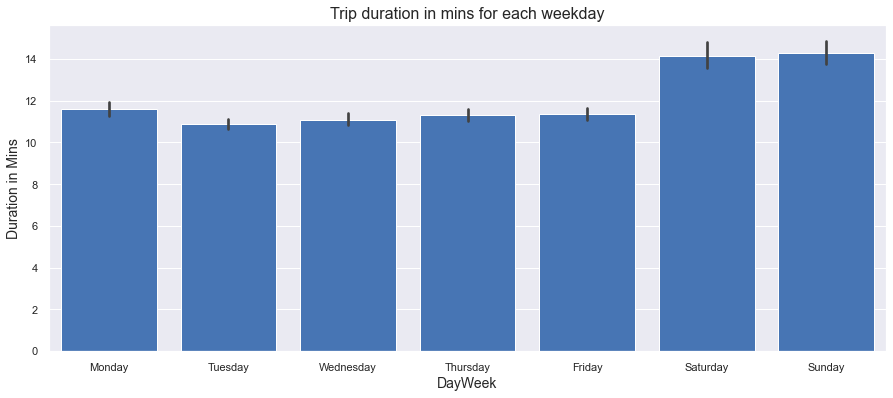

In [40]:
# plotting the relationship between the week days and the trip duration in mins in a bar chart
plt.figure(figsize = [15,6])
g = sb.barplot(data = df, x ='start_time_dayofweek', y='duration_min', color= color_base)
plt.xlabel('DayWeek', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Trip duration in mins for each weekday', fontsize = 16);

Sunday has the longest duration trips and the second most day is Saturday

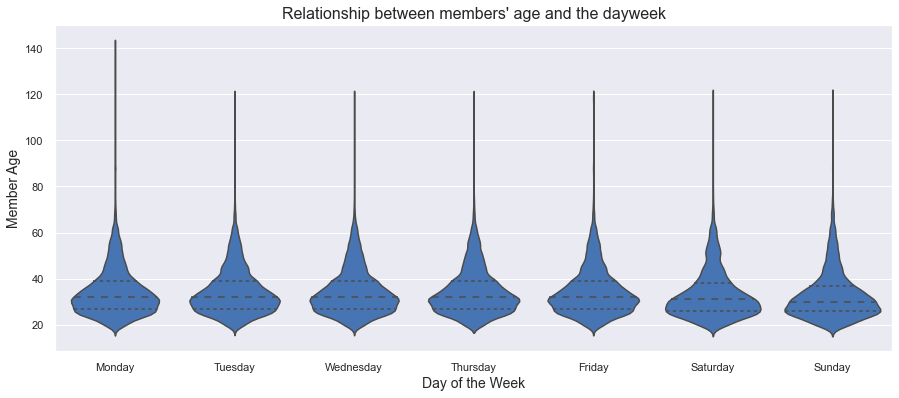

In [41]:
# plotting the relationship between the week days and the member's age in a vilion chart
plt.figure(figsize =[15,6])
g = sb.violinplot(data = df, x='start_time_dayofweek', y= 'member_age', color= color_base, inner='quartile')
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Member Age by Year', fontsize = 14)
plt.title('Relationship between members\' age and the dayweek', fontsize = 16);

It appears that no realtionship between the member's age the day of the week, all the days are equally distributed according to the member's age

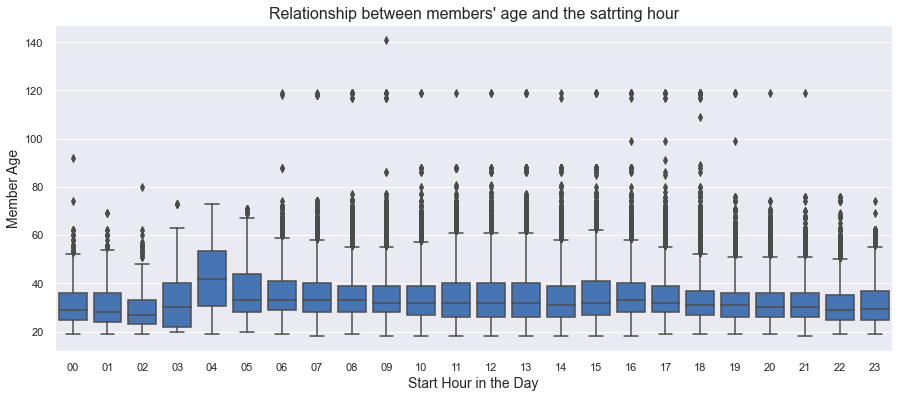

In [42]:
# plotting the relationship between the starting hour and the member' age in mins in a boxplot chart
plt.figure(figsize =[15,6])
g = sb.boxplot(data = df, x='start_hour_of_day', y= 'member_age', color= color_base)
plt.xlabel('Start Hour in the Day', fontsize = 14)
plt.ylabel('Member Age by Year', fontsize = 14)
plt.title('Relationship between members\' age and the satrting hour', fontsize = 16);

These boxplots showing that the older users prefer starting their trips at the hour 04 at the morning , there are outliers of the older ages at the next hours.

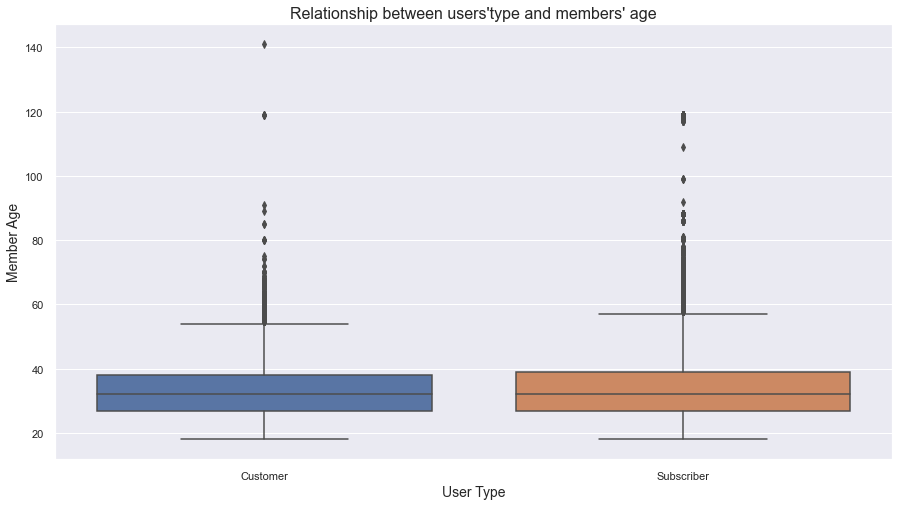

In [43]:
# plotting the relationship between the user type and the mamber's age in a boxplot chart
plt.figure(figsize =[15,8])
sb.boxplot(data = df, x='user_type', y= 'member_age')
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Member Age by Year', fontsize = 14)
plt.title('Relationship between users\'type and members\' age', fontsize = 16);

This chart showing that the customer and subscriber users are mostly equally distributed in the members age, there are few outliers in the older users of the customer type

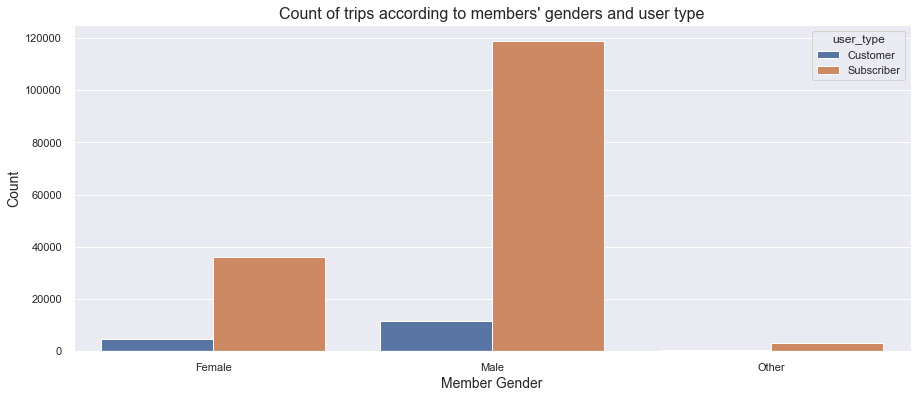

In [44]:
# countplotting the user type and member's gender
plt.figure(figsize = [15,6])
sb.countplot(data =df, x= 'member_gender', hue = 'user_type')
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of trips according to members\' genders and user type', fontsize = 16);

This Bivariate chart showing that most of the users are male subscribers.

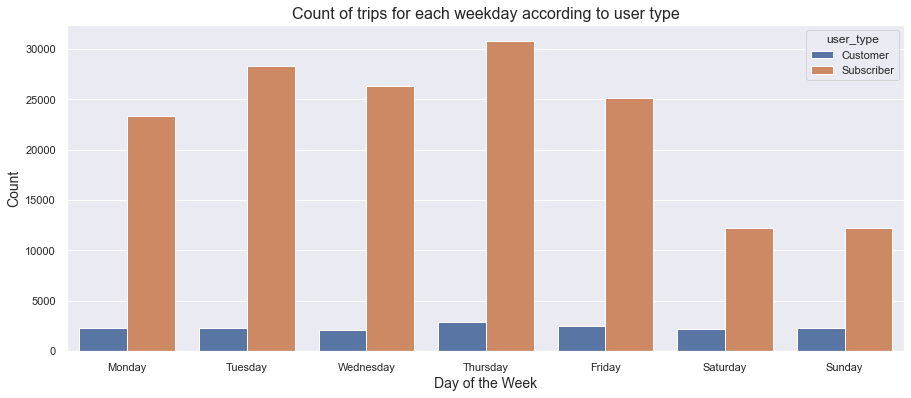

In [45]:
# plotting the count of trips for each user type in each day of the week
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type')
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of trips for each weekday according to user type', fontsize = 16);

Most of subscribers prefer Thursday for going on their bike trips.

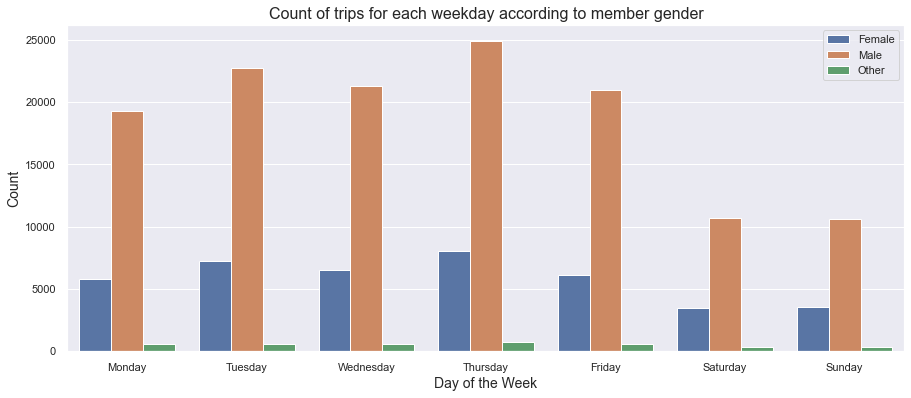

In [46]:
# plotting the count of trips for each member gender in each day of the week
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'member_gender')
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each weekday according to member gender', fontsize = 16);

Most of the users going on Thursday are of the male gender.

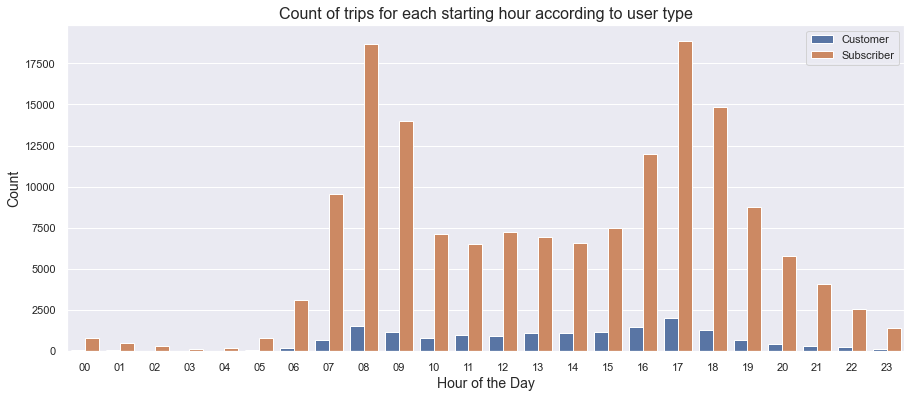

In [47]:
# plotting the count of the trips for each user type in each starting hour of the day
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_hour_of_day', hue = 'user_type')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour according to user type', fontsize = 16);

This chart is supporting the previous charts of that the most of the users are subscribers and the rush starting hours of the day are 08 at the morning and 17 afternoon.

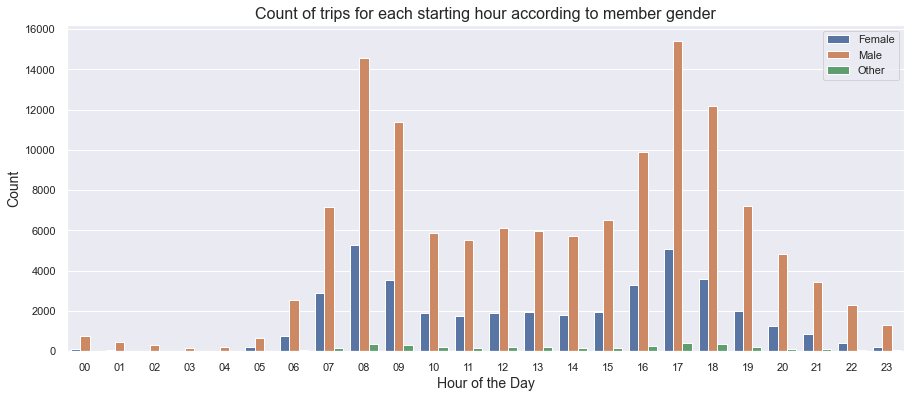

In [48]:
# plotting the count of the trips for each member gender in each starting hour of the day
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_hour_of_day', hue = 'member_gender')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour according to member gender', fontsize = 16);

This chart is supporting the previous charts of that the most of the users males and the rush starting hours of the day are 08 at the morning and 17 afternoon.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we observe that the realtionship between mamber_age and the trip duration is negatively correlated as the age is increased the trip duration is decreased and this is logic, no realtionship between the start_hour of the day and trip duration, no relationship between the day of the week and the trip duration , no relationship between member age and start_hour of the day or the weekday

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that the customer trip duration is more than subscriber, subscriber members are older than customers, most of the clients are male subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\remoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


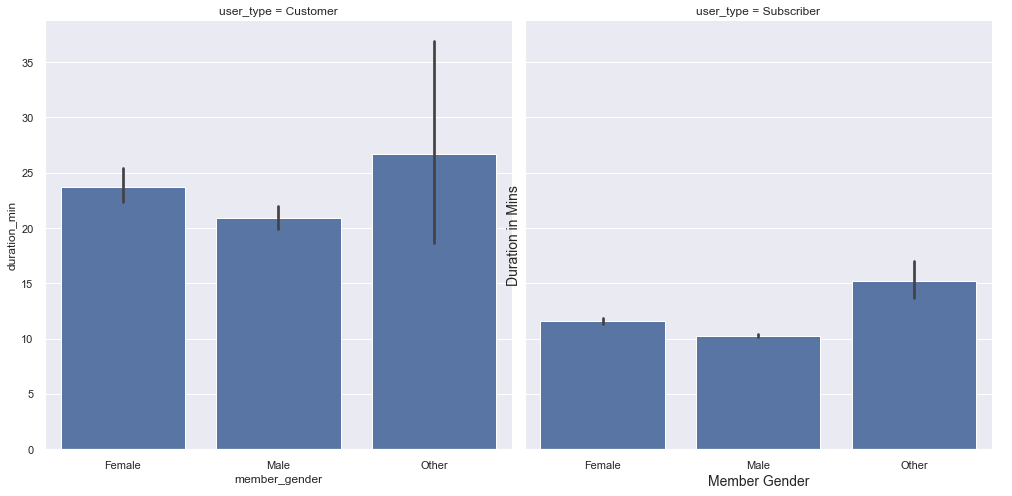

In [49]:
# plotting the relationship between member gender and the trip duration for each user type in a facet grid bar chart
g = sb.FacetGrid(data = df, col = 'user_type', height = 7, aspect = 1)
g.map(sb.barplot, 'member_gender', 'duration_min')
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
g.add_legend();

This grid is showing bar charts comparing between both types of users according to their gender and their trip duration, it is obvious that female customers and subscribers have the highest trip durations.

C:\Users\remoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


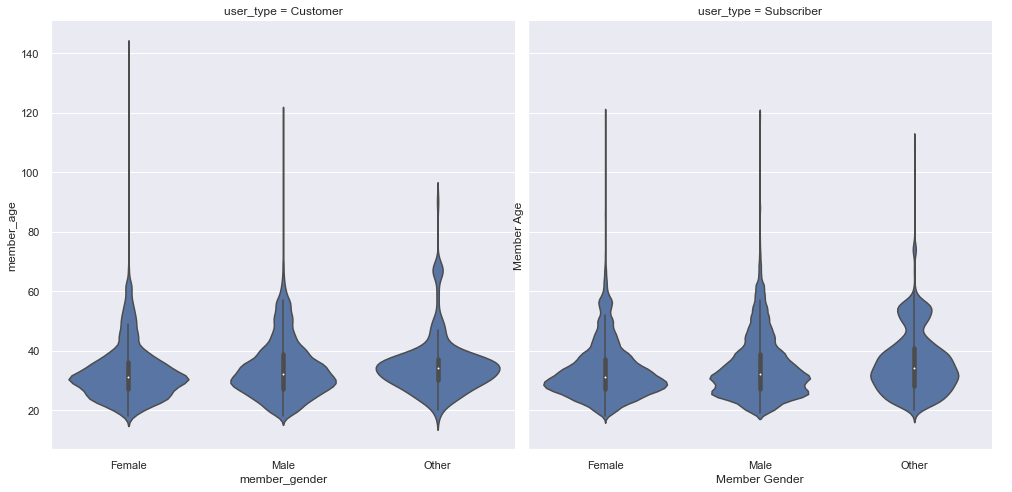

In [50]:
# plotting the relationship between member gender and the member's age for each user type in a facet grid violin chart
g = sb.FacetGrid(data = df, col = 'user_type', height = 7)
g.map(sb.violinplot, 'member_gender', 'member_age')
plt.xlabel('Member Gender')
plt.ylabel('Member Age')
g.add_legend();

This plot is comparing between the both user types according to their gender and their ages, it apppers that both user types are some type equally distributed for their ages between <20 and >60 years except for that there are few outliers in female older customers.

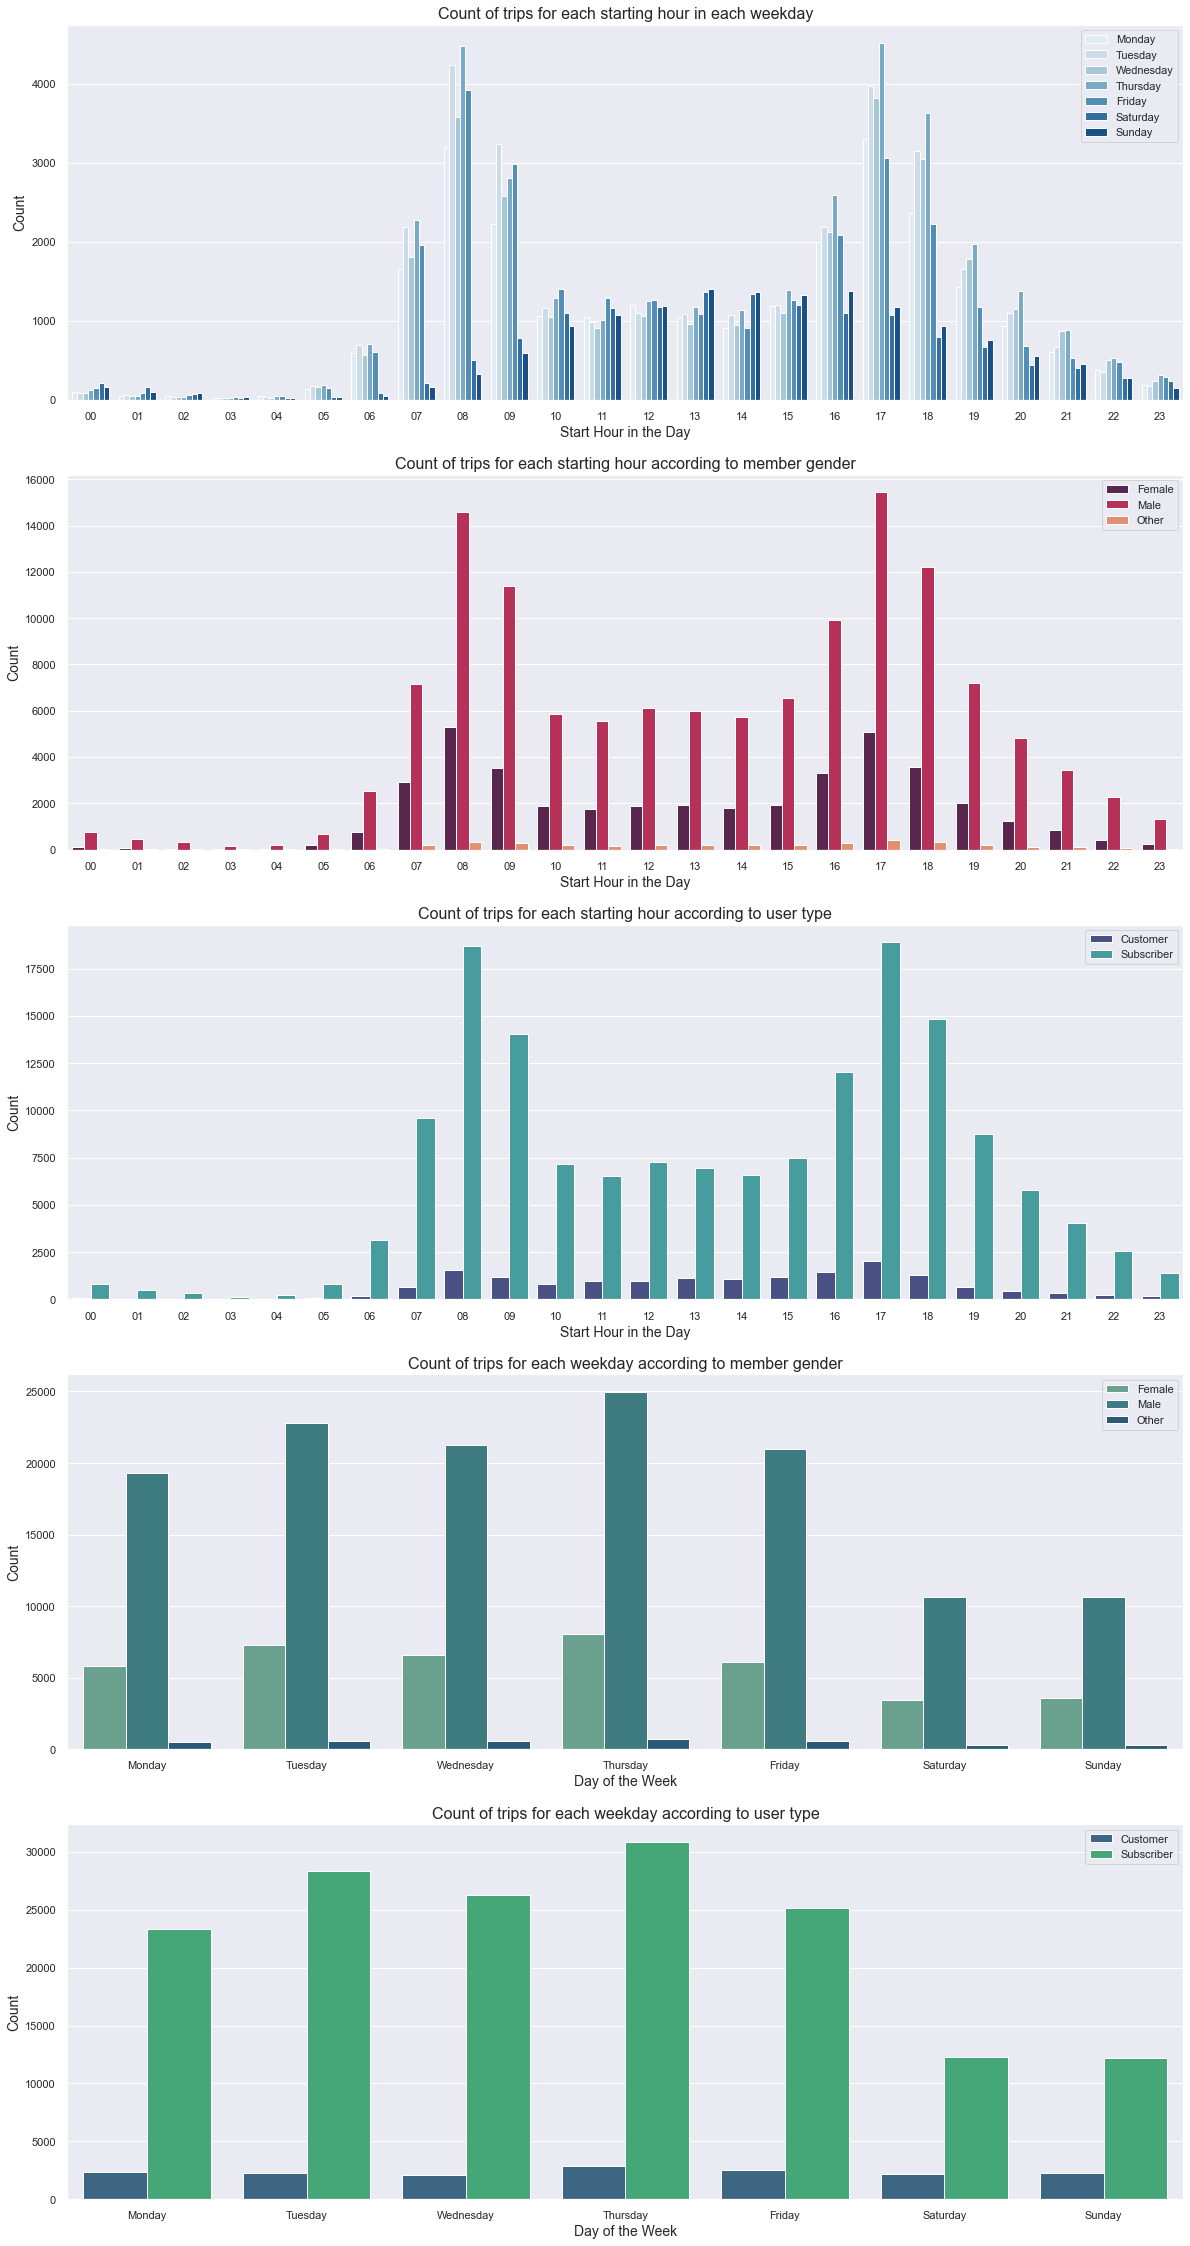

In [51]:
# pltting counts of multivariate varibles in subplots
plt.figure(figsize = [20, 40])
plt.subplot(5,1,1)
g = sb.countplot(data = df, x='start_hour_of_day', hue = 'start_time_dayofweek', palette = 'Blues')
plt.xlabel('Start Hour in the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour in each weekday', fontsize = 16);

plt.subplot(5,1,2)
g = sb.countplot(data = df, x = 'start_hour_of_day', hue = 'member_gender', palette = "rocket")
plt.xlabel('Start Hour in the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour according to member gender', fontsize = 16);

plt.subplot(5,1,3)
g = sb.countplot(data = df, x = 'start_hour_of_day', hue = 'user_type', palette = "mako")
plt.xlabel('Start Hour in the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour according to user type', fontsize = 16);

plt.subplot(5,1,4)
g = sb.countplot(data = df, x='start_time_dayofweek', hue ='member_gender', palette = "crest")
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'upper right')
plt.title('Count of trips for each weekday according to member gender', fontsize = 16);

plt.subplot(5,1,5)
g = sb.countplot(data = df, x='start_time_dayofweek', hue ='user_type', palette = "viridis")
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each weekday according to user type', fontsize = 16);


The multivariate charts strengthened that discovered in the bivariate and univariate charts, the trip counts are the most at Thursday at 08, 17 hours in the day, most of the users are male subscribers and the prefer the Thursday.

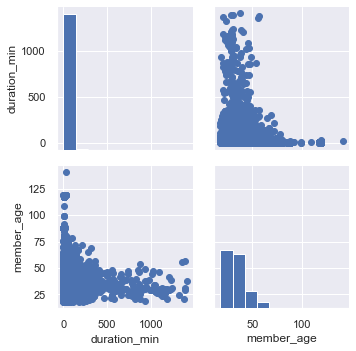

In [52]:
# multifacet grid for numeriv variables
numeric_vars = ['duration_min', 'member_age']
g = sb.PairGrid(data = df, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

This pairgrid is showing the relationship between the two numeric variables and there is negative relationship between both variables. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate charts strengthened that discovered in the bivariate and univariate charts, the trip counts are the most at Thursday at 08, 17 hours in the day, most of the users are male subscribers and the prefer the Thursday

### Were there any interesting or surprising interactions between features?

> The interactions between features are supporting each other

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!